In [4]:
source("lda.R")

In [5]:
dfs <- read_wlws(800, "segment", 1)

[1] "unzips/n800/segment.scale-1"


In [6]:
library(MASS)

pca <- prcomp( ~. -class_id, data = dfs$train, rank. = 2)

In [7]:
proj <- predict(pca, dfs$train)

In [8]:
dim(proj)
colnames(proj)
class(proj)

[1] 800   2

[1] "PC1" "PC2"

[1] "matrix" "array"

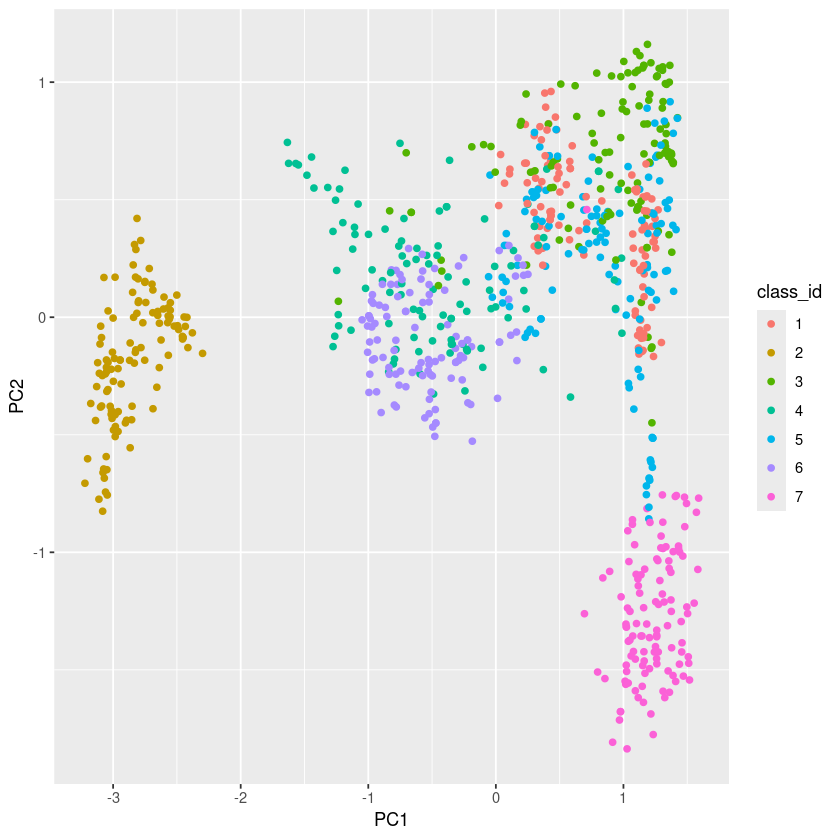

In [9]:
library(ggplot2)

dfg <- cbind(dfs$train, proj)
dfg$class_id = as.factor(dfg$class_id)
ggplot(dfg, aes(x = PC1, y = PC2, group = class_id, color = class_id)) + geom_point()

In [10]:
colnames(dfg)


[1] "class_id" "f1"       "f2"       "f3"       "f4"       "f5"      
 [7] "f6"       "f7"       "f8"       "f9"       "f10"      "f11"     
[13] "f12"      "f13"      "f14"      "f15"      "f16"      "f17"     
[19] "f18"      "f19"      "f20"      "f21"      "f22"      "f23"     
[25] "f24"      "f25"      "PC1"      "PC2"

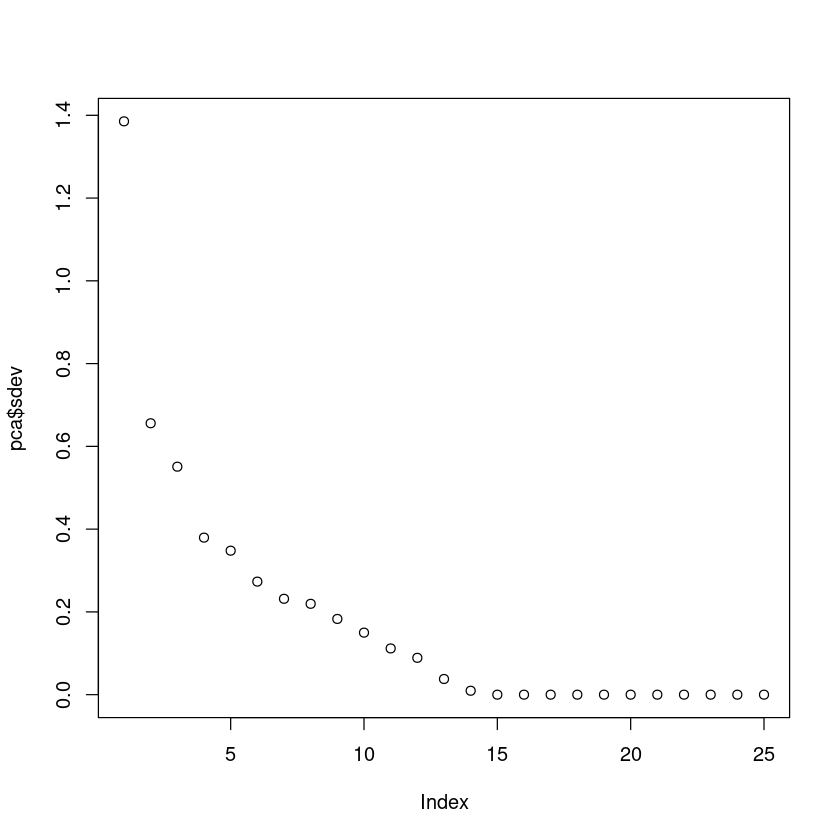

In [11]:
plot(pca$sdev)

In [12]:
m <- lda(class_id ~ . -f1 - f2 - f5-f22 - f23 - f24 - f25, data = dfs$train)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


In [13]:
names(m)

[1] "prior"   "counts"  "means"   "scaling" "lev"     "svd"     "N"      
 [8] "call"    "terms"   "xlevels"

In [14]:
ldm <- as.matrix(dplyr::select(dfs$train, -class_id,-f1, - f2, - f5,-f22, - f23, - f24, - f25)) %*% m$scaling[,1:2] 

In [15]:
dim(m$scaling)

[1] 18  6

In [16]:
dfg1 <- cbind(dfs$train, ldm)
dfg1$class_id = as.factor(dfg1$class_id)

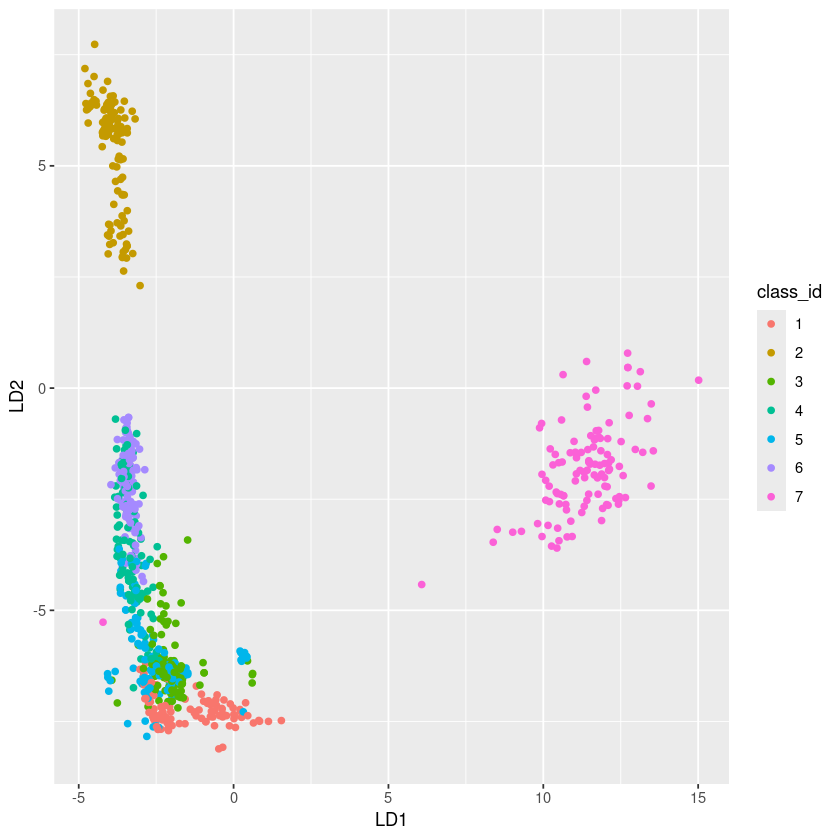

In [17]:
ggplot(dfg1, aes(x  = LD1, y = LD2, color = class_id)) + geom_point()

# Visualization without easily separated class 2 and 7

In [18]:
train2 <- filter(dfs$train, class_id %in% c(1,3,4,5,6))
pca2 <- prcomp( ~. -class_id, data = train2, rank. = 2)
proj2 <- predict(pca2, train2)

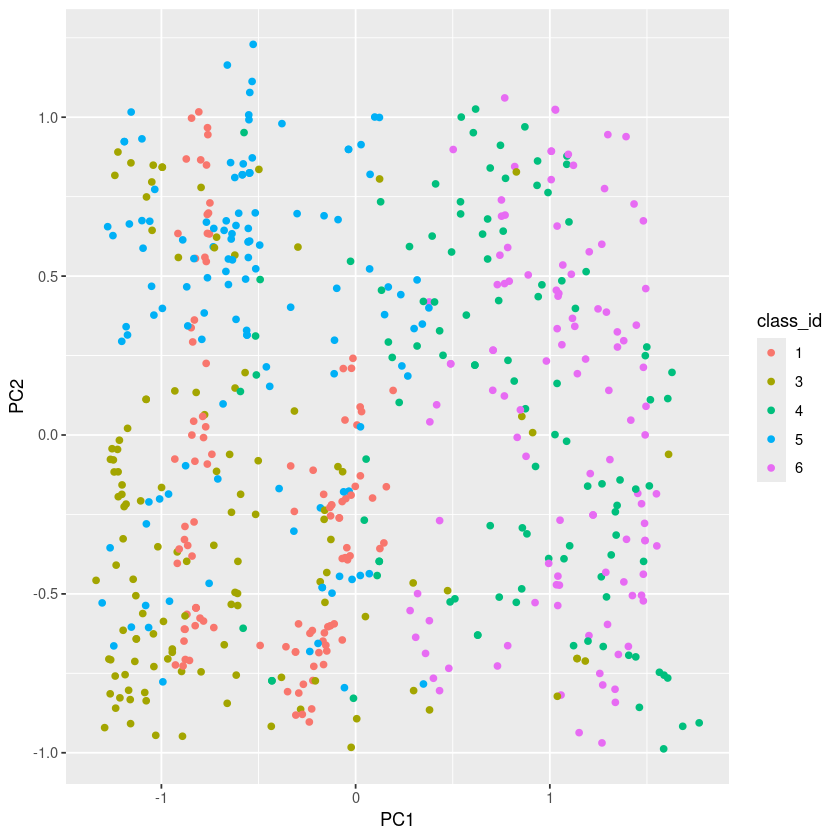

In [19]:
dfg <- cbind(train2, proj2)
dfg$class_id = as.factor(dfg$class_id)
ggplot(dfg, aes(x = PC1, y = PC2, group = class_id, color = class_id)) + geom_point()

In [21]:
m2 <- lda(class_id ~ . -f1 - f2 - f5-f22 - f23 - f24 - f25, data = train2)
ldm <- as.matrix(dplyr::select(train2, -class_id,-f1, - f2, - f5,-f22, - f23, - f24, - f25)) %*% m2$scaling[,1:2] 

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


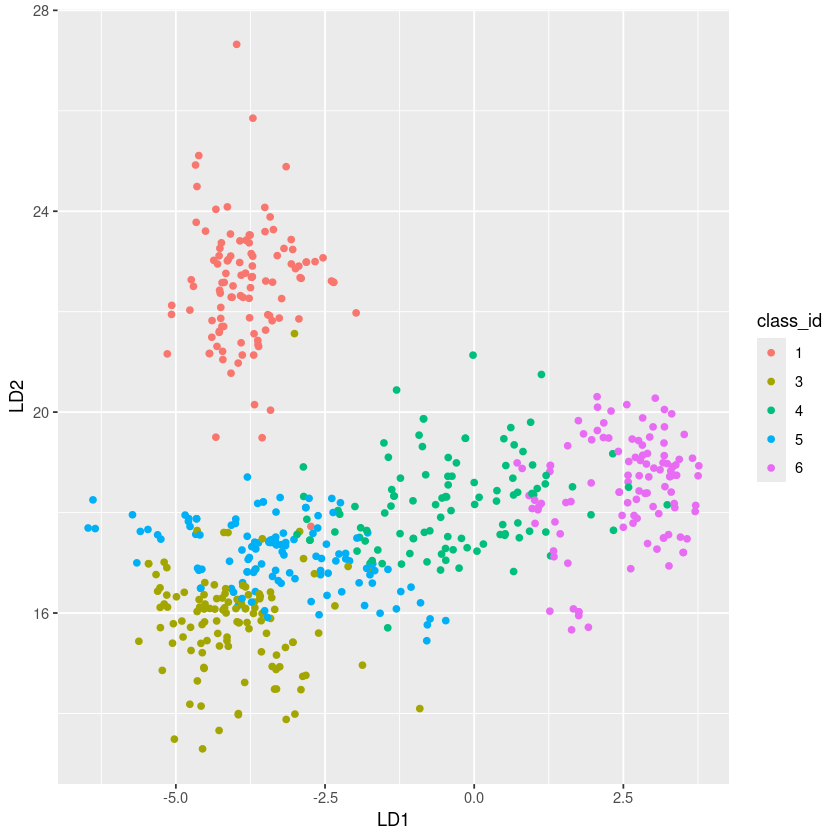

In [24]:
dfg1 <- cbind(train2, ldm)
dfg1$class_id = as.factor(dfg1$class_id)
ggplot(dfg1, aes(x  = LD1, y = LD2, color = class_id)) + geom_point()